In [5]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
from keras.src.legacy.backend import bias_add
from sklearn.preprocessing import minmax_scale


In [6]:
df=pd.read_csv('/Users/hare/Downloads/homeprices_banglore.csv')
df

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00
5,1170,2,38.00
6,2732,4,135.00
7,3300,4,155.00
8,1310,3,50.00
9,3700,5,167.00


In [7]:
#now we need to do the scaling
from sklearn import preprocessing
sx= preprocessing.MinMaxScaler()
sy=preprocessing.MinMaxScaler()
X_scaled=sx.fit_transform(df.drop('price',axis=1))
X_scaled

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [8]:
Y_scaled=sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
Y_scaled

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [9]:
w=np.ones(shape=(2))


In [10]:
#now to execute this we need to have the values of weights and bias. so as to achieve this we will use Gradient descent
def batch_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    number_of_features=X.shape[1]

    w=np.ones(shape=number_of_features)
    b=0
    cost_list=[]
    epoch_list=[]
    total_samples=X.shape[0]
    for i in range(epochs):
        y_pred=np.dot(w,X_scaled.T)+b

        w_grad=-(2/total_samples)*(X.T.dot(y_true - y_pred))
        b_grad=-(2/total_samples)*np.sum(y_true - y_pred)
        w=w-learning_rate*w_grad
        b=b-learning_rate*b_grad
        cost=np.mean(np.square(y_true - y_pred))
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w,b,cost,cost_list,epoch_list

w,b,cost,cost_list,epoch_list=batch_gradient_descent(X_scaled,Y_scaled.reshape(Y_scaled.shape[0]),epochs=500,learning_rate=0.01)
w,b,cost

(array([0.70712464, 0.67456527]),
 np.float64(-0.23034857438407427),
 np.float64(0.0068641890429808105))

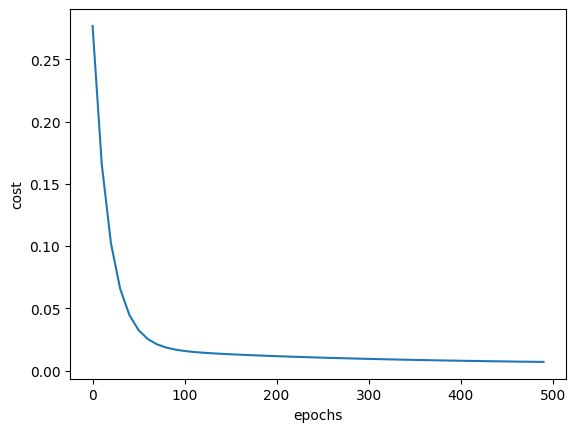

In [11]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.xlabel('epochs')
plt.ylabel('cost')
plt.plot(epoch_list,cost_list)

In [12]:
def predict(area,bedrooms,w,b) :
    scaled_X = sx.transform([[area,bedrooms]])[0]
    scaled_price = w[0]*scaled_X[0] + w[1] * scaled_X[1] + b
    return sy.inverse_transform([[scaled_price]])[0][0]
predict (2600,4,w,b)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(128.45484403267596)

In [13]:
predict(3000,5,w,b)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(164.38857029724312)

In [14]:
import random
random.randint(0,10)

10

In [15]:
def stochastic_gradient_descent(X, Y_true, epochs, learning_rate = 0.01):
    number_of_features = X. shape [1]
    # numpy array with 1 row and columns equal to number of features. In
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones (shape=(number_of_features))
    total_samples = X.shape[0]
    b=[0]
    cost_list = []
    epoch_list = []
    for i in range (epochs):
        random_index=random.randint(0,total_samples-1)
        x_scaled=X[random_index]
        y_scaled=Y_true[random_index]
        y_pred=np.dot(w,x_scaled.T)+b
        w_grad=-(2/total_samples)*(X.T.dot(Y_true - y_pred))
        b_grad=-(2/total_samples)*np.sum(Y_true - y_pred)
        w=w-learning_rate*w_grad
        b=b-learning_rate*b_grad
        cost=np.mean(np.square(Y_true - y_pred))
        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)
            print(cost)
    return w,b,cost,cost_list,epoch_list
w_sgd,b_sgd,cost_sgd,cost_list_sgd,epoch_list_sgd=stochastic_gradient_descent(X_scaled,Y_scaled.reshape(Y_scaled.shape[0]),epochs=50000,learning_rate=0.01)
w_sgd,b_sgd,cost_sgd

0.2663804175605825
0.3156355990373335
0.5049056257397779
0.6184499182619658
0.8025493302005657
0.3842605109638405
0.11737465656197306
0.18068024545164454
1.0699987565992097
0.10012332292154018
0.23025229543132567
1.123248873639085
0.20672949195562618
3.5192914141386415
0.1857386038423278
0.10992652751966145
1.0888153761305963
1.6195886970139006
0.10091068748493337
5.423534188802281
1.474910763902292
2.727710008720245
1.7017428090894833
0.10148278571458894
10.615704249738679
4.9788104338452195
6.265484449940885
12.82164462761168
12.30265793237756
15.667248119280254
6.9691248066685505
7.294465511403075
19.338386862480213
5.205279811675135
7.80172555443813
1.3663612719075755
1.2242105473971296
4.908125981000799
4.765618630580899
6.486134147721296
7.667463779436959
5.333302886067607
9.99160097735465
6.769187758844351
8.95040357052698
7.4619563897939685
8.163081510542742
0.30100605694601973
0.1383736511507786
1.4264025657392208
8.252175812239123
71.46279676518962
1.4421262767074192
0.457220

(array([74.74540959, 46.29078235]),
 array([-46.88041922]),
 np.float64(884.6279934096694))

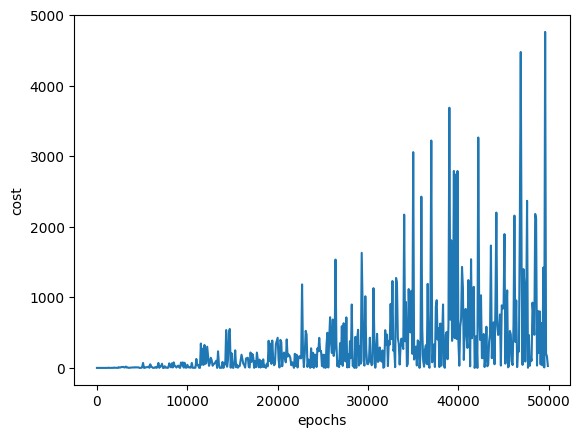

In [16]:
plt.xlabel('epochs')
plt.ylabel('cost')
plt.plot(epoch_list_sgd,cost_list_sgd)

Epoch 0: Cost = 0.2494
Epoch 10: Cost = 0.0931
Epoch 20: Cost = 0.0416
Epoch 30: Cost = 0.0243
Epoch 40: Cost = 0.0181
Epoch 50: Cost = 0.0155
Epoch 60: Cost = 0.0142
Epoch 70: Cost = 0.0134
Epoch 80: Cost = 0.0127
Epoch 90: Cost = 0.0121
Epoch 100: Cost = 0.0115
Epoch 110: Cost = 0.0110
Epoch 120: Cost = 0.0105
Epoch 130: Cost = 0.0101
Epoch 140: Cost = 0.0097
Epoch 150: Cost = 0.0093
Epoch 160: Cost = 0.0090
Epoch 170: Cost = 0.0087
Epoch 180: Cost = 0.0084
Epoch 190: Cost = 0.0081
Epoch 200: Cost = 0.0079
Epoch 210: Cost = 0.0076
Epoch 220: Cost = 0.0074
Epoch 230: Cost = 0.0072
Epoch 240: Cost = 0.0070
Epoch 250: Cost = 0.0068
Epoch 260: Cost = 0.0067
Epoch 270: Cost = 0.0065
Epoch 280: Cost = 0.0064
Epoch 290: Cost = 0.0063
Epoch 300: Cost = 0.0061
Epoch 310: Cost = 0.0060
Epoch 320: Cost = 0.0059
Epoch 330: Cost = 0.0058
Epoch 340: Cost = 0.0057
Epoch 350: Cost = 0.0056
Epoch 360: Cost = 0.0056
Epoch 370: Cost = 0.0055
Epoch 380: Cost = 0.0054
Epoch 390: Cost = 0.0054
Epoch 400: 

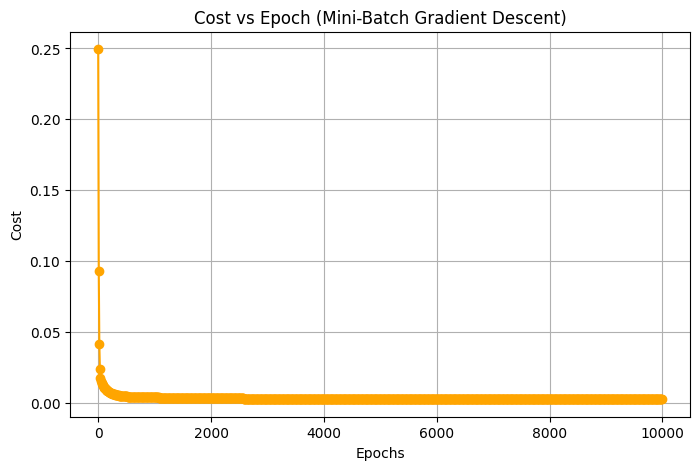

In [17]:
#Implement mini batch gradient descent in python and plot cost vs epoch graph. Mini batch is intermediate version of batch GD and stochastic GD. In stochastic we used one randomly picked training sample, In mini gradient descent you will use a batch of samples in each iterations. For example if you have total 50 training samples, you can take a batch of 10 samples, calculate cumulitive error for those 10 samples and then adjust weights. In SGD we adjust weights after every one sample. In Batch we adjust weights after going through all samples but in mini batch we do after every m samples (where m is batch size and it is 0 < m < n, where n is total number of samples

def mini_batch_gradient_descent(X, Y_true, epochs, learning_rate=0.01, batch_size=10):
    # Initialize parameters
    n_samples, n_features = X.shape
    w = np.ones(n_features)
    b = 0
    X_scaled=sx.fit_transform(df.drop('price',axis=1))
    cost_list = []
    epoch_list = []

    # Training loop
    for epoch in range(epochs):
        # Shuffle data for every epoch
        indices = np.arange(n_samples)
        np.random.shuffle(indices)
        X = X[indices]
        Y_true = Y_true[indices]

        # Mini-batch training
        for i in range(0, n_samples, batch_size):
            X_batch = X[i:i+batch_size]
            Y_batch = Y_true[i:i+batch_size]

            # Predictions
            Y_pred = np.dot(X_batch, w) + b

            # Gradients
            w_grad = -(2/len(X_batch)) * np.dot(X_batch.T, (Y_batch - Y_pred))
            b_grad = -(2/len(X_batch)) * np.sum(Y_batch - Y_pred)

            # Parameter update
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad

        # Compute cost after each epoch
        Y_pred_full = np.dot(X, w) + b
        cost = np.mean(np.square(Y_true - Y_pred_full))

        if epoch % 10 == 0:
            cost_list.append(cost)
            epoch_list.append(epoch)
            print(f"Epoch {epoch}: Cost = {cost:.4f}")

    # Plot cost vs epoch
    plt.figure(figsize=(8,5))
    plt.plot(epoch_list, cost_list, marker='o', color='orange')
    plt.title("Cost vs Epoch (Mini-Batch Gradient Descent)")
    plt.xlabel("Epochs")
    plt.ylabel("Cost")
    plt.grid(True)
    plt.show()

    return w, b, cost, cost_list, epoch_list
X_batchGD,y_batchGD,cost_batchGD,cost_list_batchGD,epoch_list_batchGD=mini_batch_gradient_descent(X_scaled,Y_scaled.reshape(Y_scaled.shape[0]),epochs=10000,learning_rate=0.01)